In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Load dataset
data = pd.read_csv('chocolte data/Chocolate Sales.csv')
print(data.head(5))

     Sales Person    Country              Product       Date    Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco  04-Jan-22   $5,320    
1     Van Tuxwell      India        85% Dark Bars  01-Aug-22   $7,896    
2    Gigi Bohling      India  Peanut Butter Cubes  07-Jul-22   $4,501    
3    Jan Morforth  Australia  Peanut Butter Cubes  27-Apr-22  $12,726    
4  Jehu Rudeforth         UK  Peanut Butter Cubes  24-Feb-22  $13,685    

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  


In [21]:
# Step 1: Data Cleaning and Preparation
data['Amount'] = data['Amount'].str.replace('[\$,]', '', regex=True).astype(float) 
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')  
print("Dataset Info:")
print(data.info())  # Check structure
print("\nMissing Values:\n", data.isnull().sum())  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   float64       
 5   Boxes Shipped  1094 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 51.4+ KB
None

Missing Values:
 Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64


In [22]:
# Step 2: Summary Statistics
print("\nSummary Statistics:")
print(data.describe()) 


Summary Statistics:
                                Date        Amount  Boxes Shipped
count                           1094   1094.000000    1094.000000
mean   2022-05-03 09:04:56.160877568   5652.308044     161.797989
min              2022-01-03 00:00:00      7.000000       1.000000
25%              2022-03-02 00:00:00   2390.500000      70.000000
50%              2022-05-11 00:00:00   4868.500000     135.000000
75%              2022-07-04 00:00:00   8027.250000     228.750000
max              2022-08-31 00:00:00  22050.000000     709.000000
std                              NaN   4102.442014     121.544145


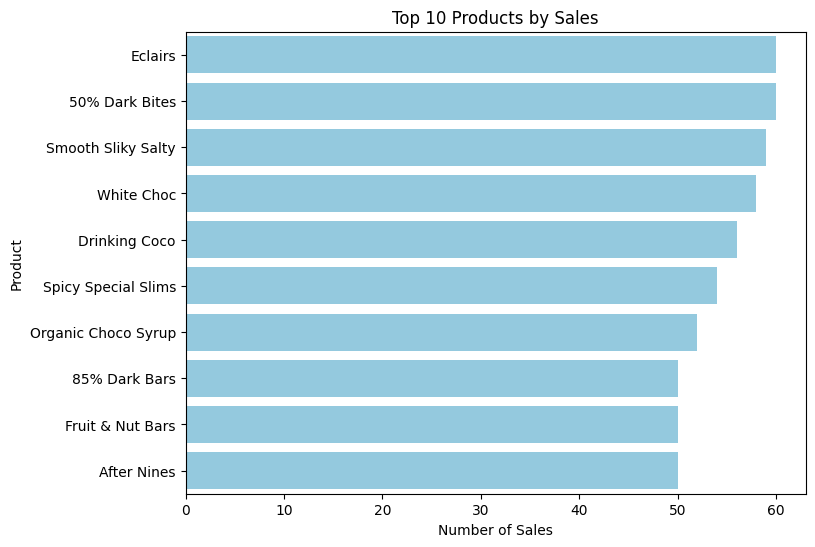

In [23]:
# Step 3: Univariate Analysis - Top Products by Sales
top_products = data['Product'].value_counts().head(10)
plt.figure(figsize=(8, 6))
sns.barplot(y=top_products.index, x=top_products.values, color='skyblue')
plt.title('Top 10 Products by Sales')
plt.xlabel('Number of Sales')
plt.ylabel('Product')
plt.show()


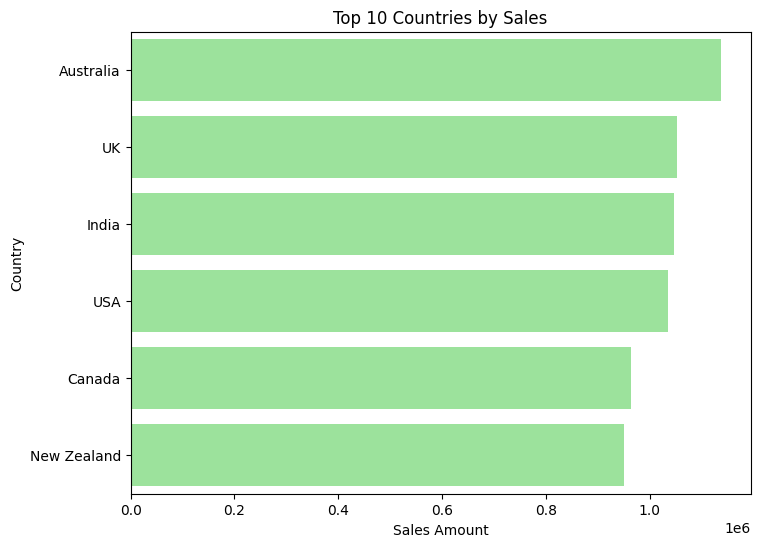

In [24]:
# Step 4: Bivariate Analysis - Sales by Country
country_sales = data.groupby('Country')['Amount'].sum().nlargest(10)
plt.figure(figsize=(8, 6))
sns.barplot(y=country_sales.index, x=country_sales.values, color='lightgreen')
plt.title('Top 10 Countries by Sales')
plt.xlabel('Sales Amount')
plt.ylabel('Country')
plt.show()

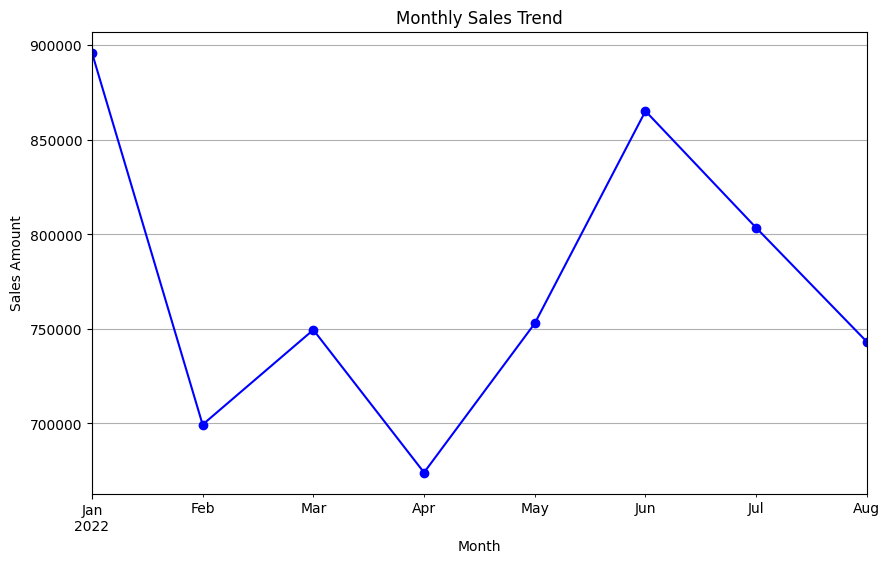

In [30]:
# Step 5: Temporal Analysis - Monthly Sales Trend
monthly_sales = data.resample('ME', on='Date')['Amount'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o', color='blue', title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.show()

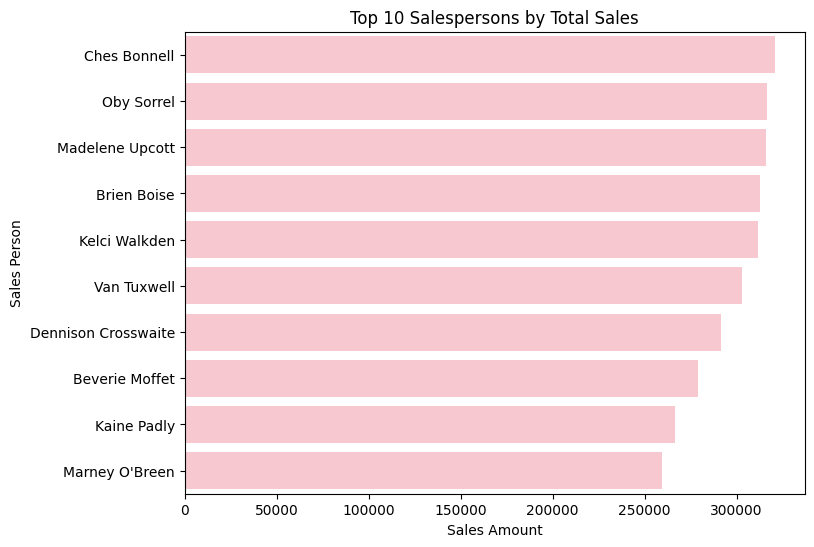

In [26]:
# Step 6: Multivariate Analysis - Top Salespersons
top_salespersons = data.groupby('Sales Person')['Amount'].sum().nlargest(10)
plt.figure(figsize=(8, 6))
sns.barplot(y=top_salespersons.index, x=top_salespersons.values, color='pink')
plt.title('Top 10 Salespersons by Total Sales')
plt.xlabel('Sales Amount')
plt.ylabel('Sales Person')
plt.show()


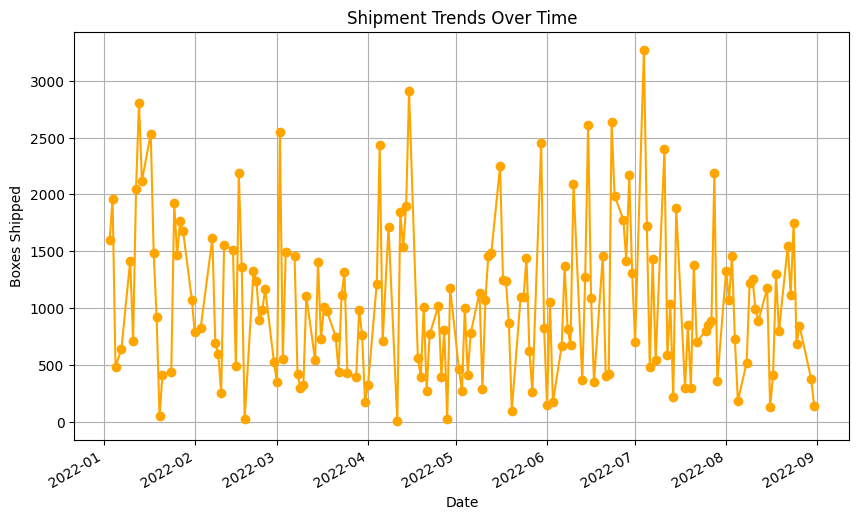

In [27]:
# Step 7: Shipment Trends Over Time
shipment_trends = data.groupby('Date')['Boxes Shipped'].sum()
plt.figure(figsize=(10, 6))
shipment_trends.plot(marker='o', color='orange', title='Shipment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Boxes Shipped')
plt.grid(True)
plt.show()